# 分类问题


In [144]:
import  torch
import torch.nn as nn
import torch.nn.functional as func
import matplotlib.pyplot as plt

In [156]:
n_data=torch.ones(100,2)
x0=torch.normal(2*n_data,1)
y0=torch.zeros(100)
x1=torch.normal(-2*n_data,1)
y1=torch.ones(100)
x=torch.cat((x0,x1)).type(torch.FloatTensor) 
y=torch.cat((y0,y1)).type(torch.LongTensor) 

In [157]:
x.shape,y.size()

(torch.Size([200, 2]), torch.Size([200]))

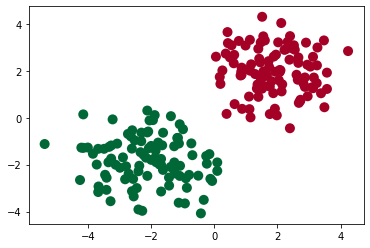

In [158]:
plt.show()
plt.scatter(x.numpy()[:,0],x.numpy()[:,1],c=y.data.numpy(),s=100, lw=0,cmap='RdYlGn')

In [161]:

class Net(torch.nn.Module):
    
    def __init__(self,n_features,n_hidden,n_output):
        super(Net, self).__init__()
        self.hidden = nn.Linear(n_features,n_hidden)
        self.output = nn.Linear(n_hidden,n_output)


    def forward(self, x):
        x = func.relu(self.hidden(x))
        x = self.output(x)
        return x


        

/home/jdm/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


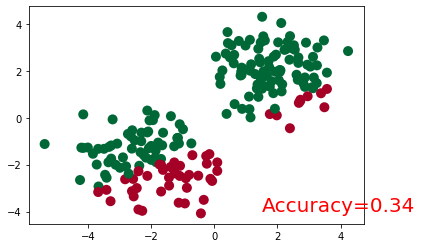

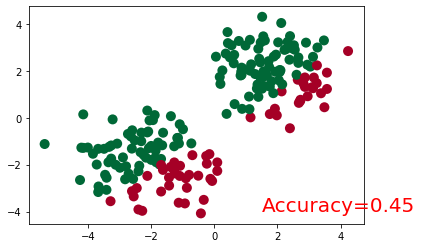

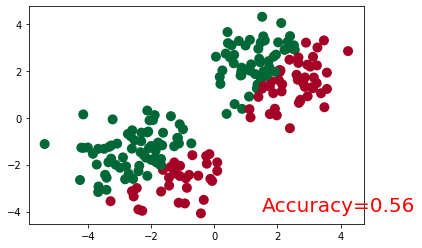

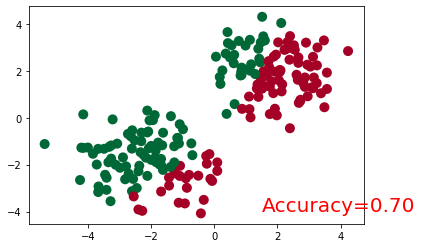

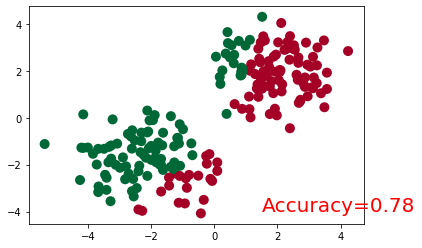

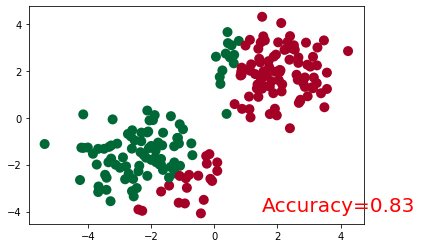

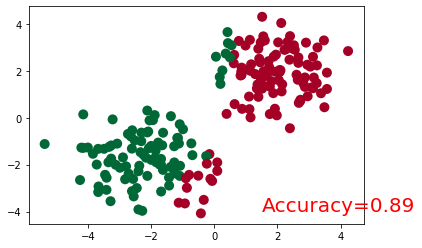

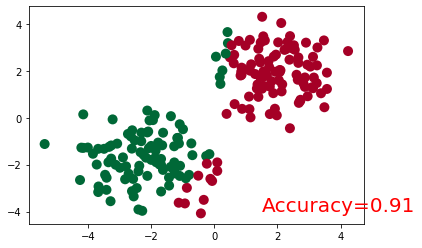

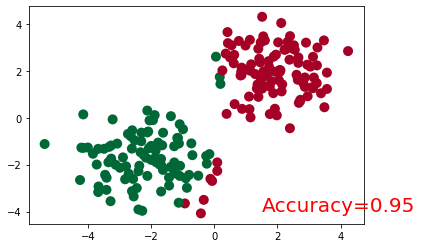

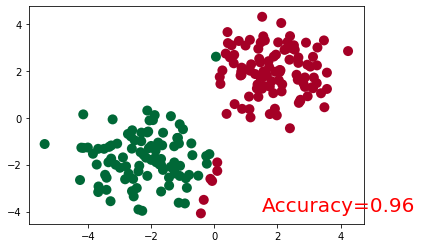

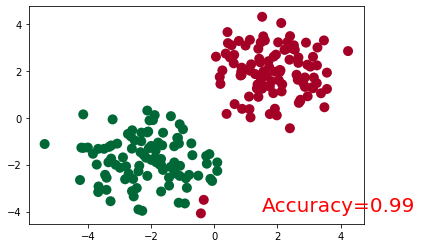

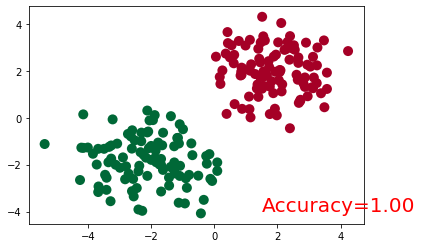

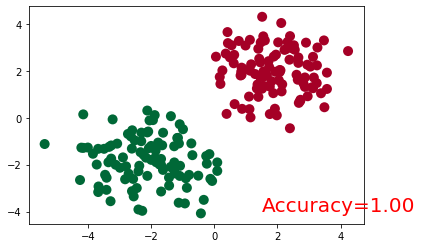

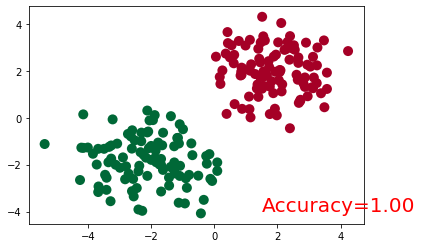

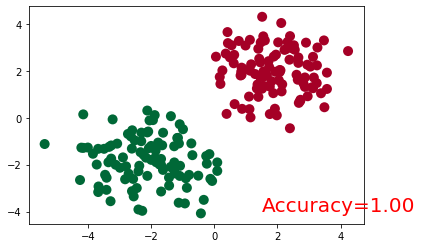

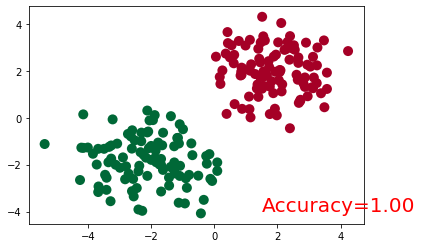

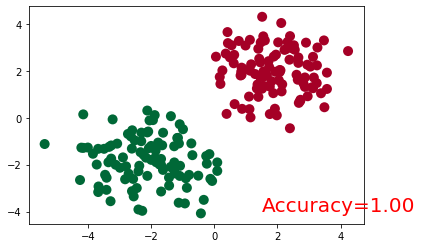

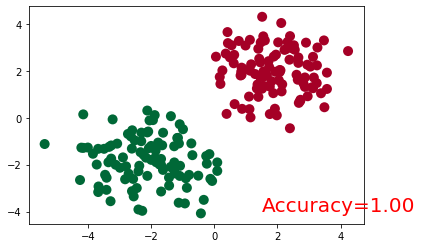

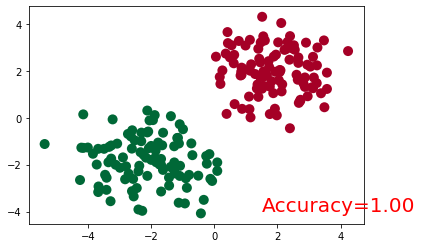

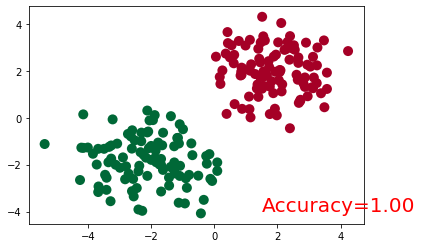

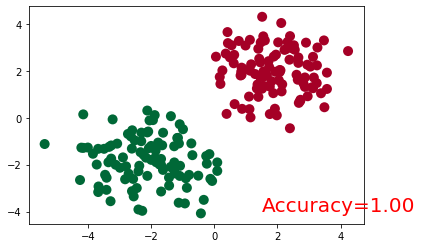

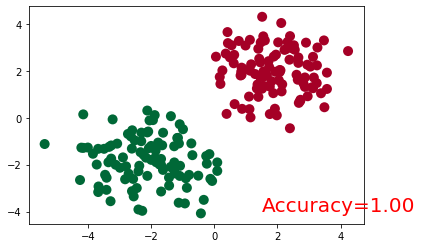

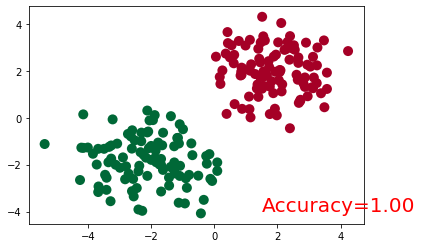

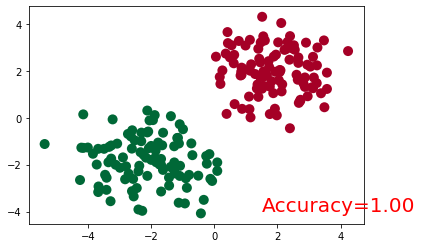

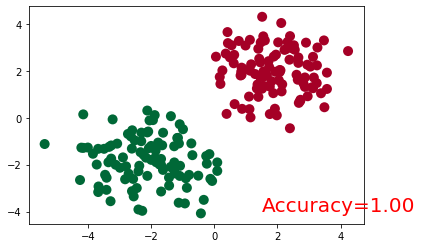

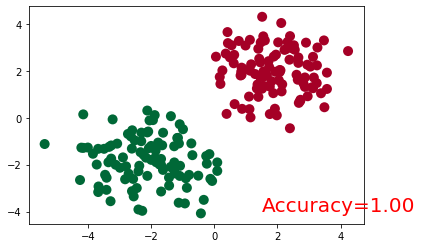

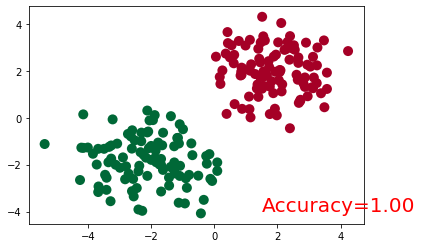

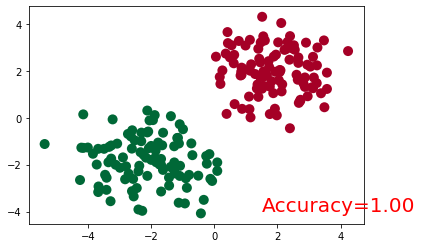

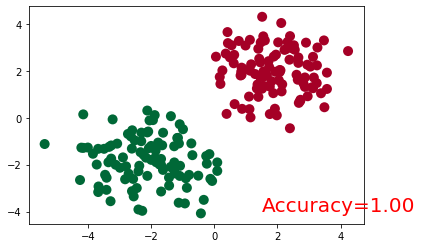

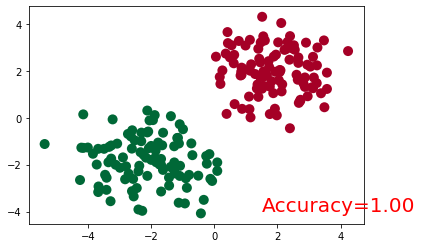

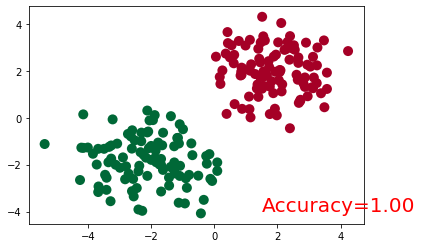

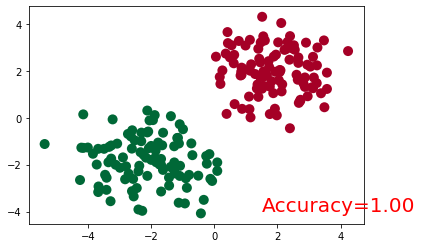

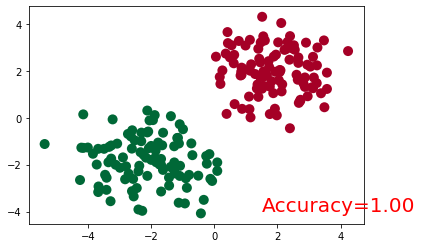

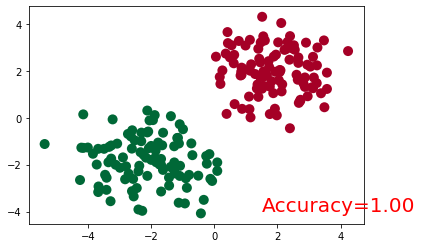

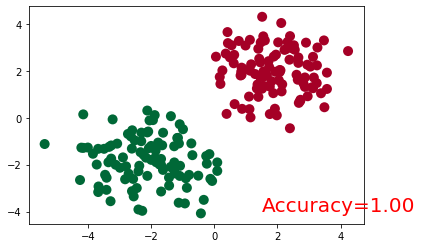

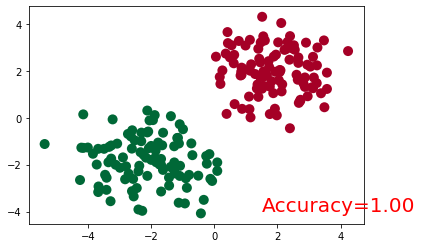

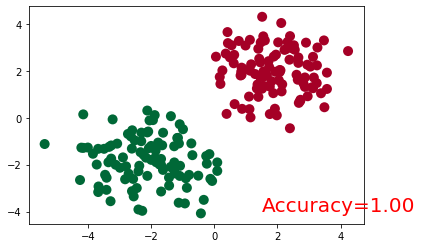

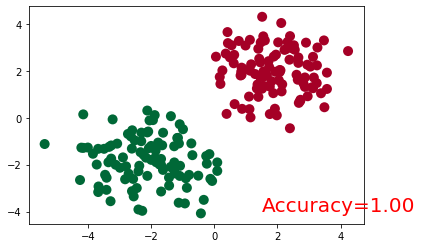

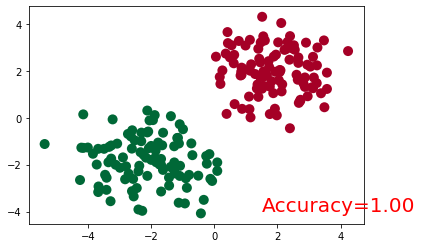

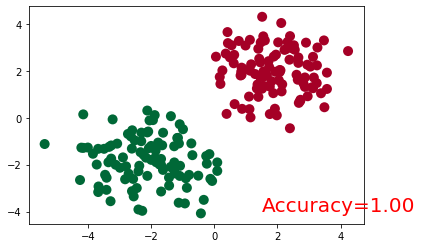

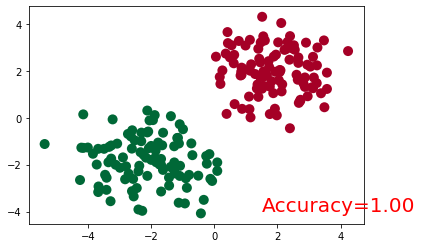

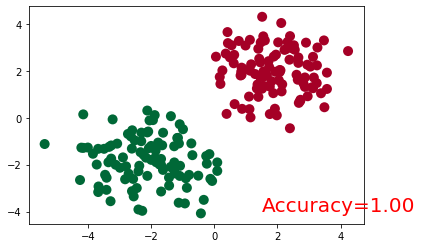

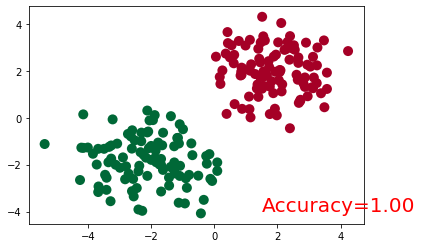

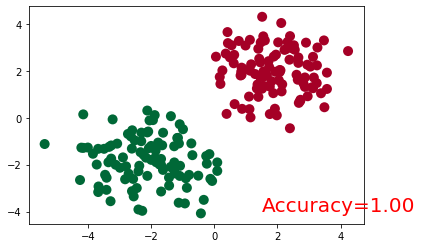

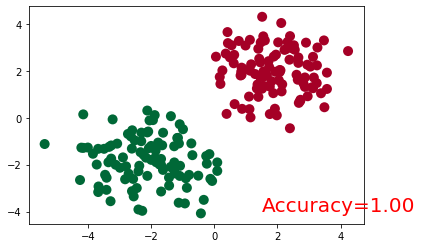

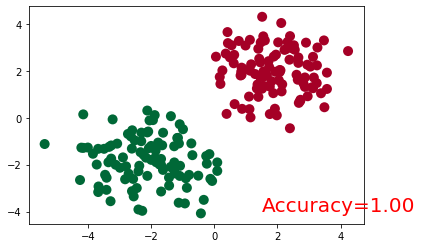

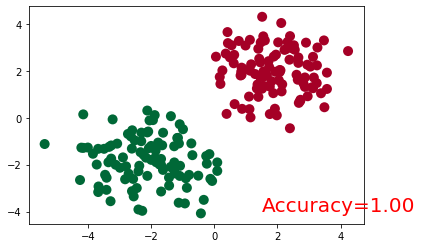

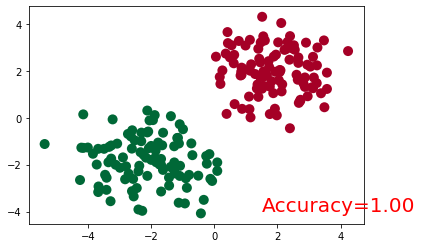

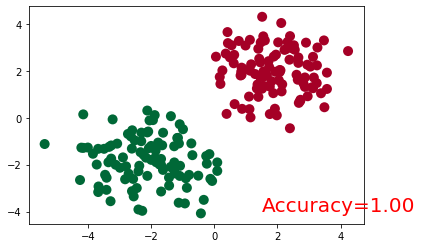

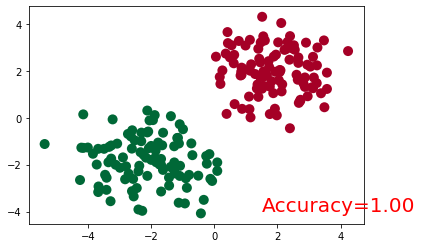

In [166]:
plt.show()
plt.ion()
net= Net(n_features=2,n_hidden=10,n_output=2)
optimizer=torch.optim.SGD( net.parameters(),lr=0.02)
loss_func=torch.nn.CrossEntropyLoss()

for t in range(100):
    out = net(x)     # 喂给 net 训练数据 x, 输出分析值

    loss = loss_func(out, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上
    if t % 2 == 0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(func.softmax(out), dim=1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

[Parameter containing:
tensor([[-0.0749, -0.7776],
        [ 0.5096, -0.4971],
        [ 0.7660,  0.6869],
        [-0.1496,  0.0496],
        [-0.1512,  0.2566],
        [-0.1963,  0.4690],
        [-0.0710,  0.1923],
        [-0.4781, -0.1594],
        [ 0.6344,  0.5029],
        [-0.0748,  0.5681]], requires_grad=True), Parameter containing:
tensor([ 0.6315,  0.4251,  0.0981, -0.3792, -0.4161, -0.3238,  0.5677,  0.5107,
        -0.3663,  0.5216], requires_grad=True), Parameter containing:
tensor([[-0.3879,  0.2658,  0.2582, -0.1274, -0.1191, -0.0862, -0.1410, -0.0878,
          0.1869,  0.2686],
        [ 0.4769, -0.1279, -0.5266, -0.0726,  0.0286,  0.1238, -0.1602,  0.3293,
         -0.1222, -0.1837]], requires_grad=True), Parameter containing:
tensor([-0.1654,  0.1778], requires_grad=True)]
[Parameter containing:
tensor([[-0.0881, -0.7857],
        [ 0.5146, -0.4929],
        [ 0.7729,  0.6921],
        [-0.1498,  0.0496],
        [-0.1513,  0.2562],
        [-0.1971,  0.4679],
  